<a href="https://colab.research.google.com/github/frank2720/DAtasks/blob/main/Am_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Business Case

You work in analytics at Santander Bank, an international banking company. You have been tasked with clustering loan customers in their US market.

A basic description of the **[bank_cluster.csv](https://github.com/CHill-MSU/INFO583/blob/main/bank_cluster.csv)** dataset is below:

| Variable | Description |
| ----------- | ----------- |
| age | age of customer (in years)|
| default| indicates if the customer has credit in default (1) or not (0)|
| balance| average yearly balance|
| housing| indicates if the customer has a housing loan (1) or not (0)|
| loan | indicates if the customer has a personal loan (1) or not (0)|
| duration | last contact duration with customer (in seconds)|
| campaign | the number of marketing campaign contacts with the customer|
| previous | the number of contacts before this marketing campaign|

<hr>



## Import Packages:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import pairwise, silhouette_samples
from sklearn.metrics import silhouette_score, adjusted_rand_score, v_measure_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from pandas.plotting import parallel_coordinates
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.manifold import TSNE

<hr>

## Questions:

>  0. **(a) Use the 'bank_cluster.csv' file to create a dataframe named data. Then, view the first 5 observations in the `data` dataframe.**

In [ ]:
#I will upload the csv file first and then use it to create the dataframe
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('bank_cluster.csv')
data.head()

Saving bank_cluster.csv to bank_cluster (4).csv


,age,default,balance,housing,loan,duration,campaign,previous
0,35,0,0,1,0,477,1,0
1,45,0,295,1,0,92,1,0
2,35,0,847,1,0,85,2,0
3,37,0,487,0,1,155,15,0
4,48,0,0,1,0,85,1,2


>  0. **(b) View the dataframe information to evaluate variable types and missingness.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       4521 non-null   int64
 1   default   4521 non-null   int64
 2   balance   4521 non-null   int64
 3   housing   4521 non-null   int64
 4   loan      4521 non-null   int64
 5   duration  4521 non-null   int64
 6   campaign  4521 non-null   int64
 7   previous  4521 non-null   int64
dtypes: int64(8)
memory usage: 282.7 KB


>  0. **(c) View descriptive statistic information for the `data` dataframe.**

In [ ]:
data.describe()

,age,default,balance,housing,loan,duration,campaign,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,0.016810,1422.657819,0.566025,0.152842,263.961292,2.793630,0.542579
std,10.576211,0.128575,3009.638142,0.495676,0.359875,259.856633,3.109807,1.693562
min,19.000000,0.000000,-3313.000000,0.000000,0.000000,4.000000,1.000000,0.000000
25%,33.000000,0.000000,69.000000,0.000000,0.000000,104.000000,1.000000,0.000000
50%,39.000000,0.000000,444.000000,1.000000,0.000000,185.000000,2.000000,0.000000
75%,49.000000,0.000000,1480.000000,1.000000,0.000000,329.000000,3.000000,0.000000
max,87.000000,1.000000,71188.000000,1.000000,1.000000,3025.000000,50.000000,25.000000


<hr>

>  1. **(a) (5) You will omit the `default` variable from your clustering for external validation. Store the default variable as `y` and all other variables in `data` as `X`.**

In [ ]:
y=data['default']
X=data.drop('default',axis='columns')

>  1. **(b) (5) Apply range normalization to `X`.**

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)



---



>  2. **(a) (5) Fit a Hierarchical Cluster Analysis model using Ward's method.**

In [ ]:
Z = linkage(X_scaled, method='ward')

>  2. **(b) (5) Obtain the Cophenetic Correlation. Is this model a good fit to the data? Why or why not?**

In [ ]:
c, coph_dists = cophenet(Z, pdist(X_scaled))
print("Cophenetic correlation coefficient:", c)

Cophenetic correlation coefficient: 0.9144374725960975


The model is a good fit to the data because the CCC is greater than the threshold value 0.75

>  2. **(c) (5) Next, identify the optimal number of clusters, k. Consider k values up to 25.**


In [ ]:
#Will use silhouette score and test k from 2 to 25
sil_scores = []
for k in range(2, 26):
    cluster_labels = fcluster(Z, k, criterion='maxclust')
    score = silhouette_score(X_scaled, cluster_labels)
    sil_scores.append(score)

#Now finding the optimal number and add 2 to it since range starts at 2
optc_k = np.argmax(sil_scores) + 2
print("The optimal number of clusters is:", optc_k)

The optimal number of clusters is: 4


>  2. **(d) (5) Store the optimal *k* value as a variable named `k_val_HCA`. Then, use it to make cluster assignments.**

In [ ]:
k_val_HCA=optc_k
cluster_labels = fcluster(Z, k_val_HCA, criterion='maxclust')

>  2. **(e) (5) Plot the dendrogram for your HCA model with *k* = `k_val_HCA`**

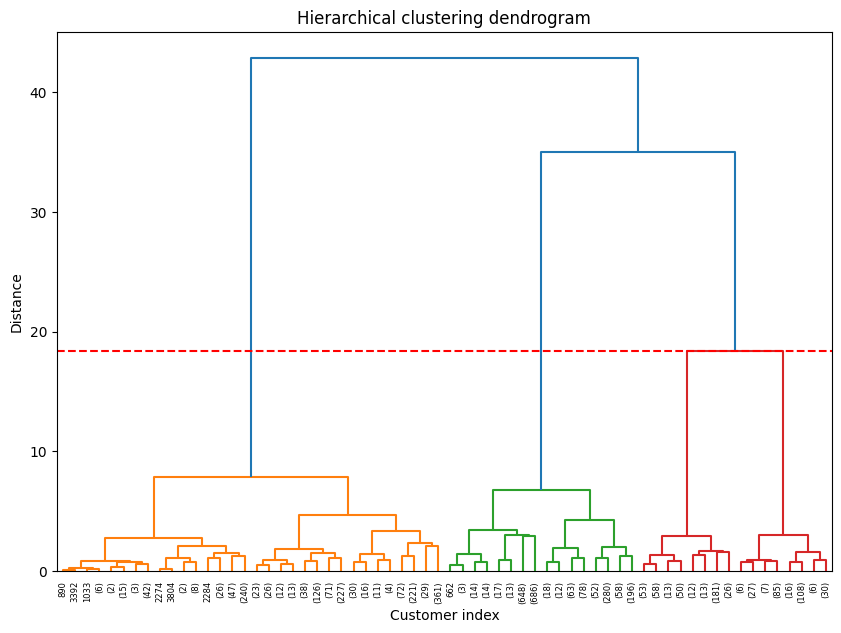

In [ ]:
#I will graph and show only top 5 levels of merges in the dendrogram to make the graph much cleaner
plt.figure(figsize=(10,7))
dendrogram(Z, truncate_mode='level', p=5)
plt.axhline(
    y=Z[-(k_val_HCA-1), 2],
    color='red', linestyle='--'
)
plt.title("Hierarchical clustering dendrogram")
plt.xlabel("Customer index")
plt.ylabel("Distance")
plt.show()

>  2. **(f) (5) Store the following validation measures for your HCA model to compare with your kMeans solution later: WSS, Silhouette, and Adjusted Rand Index (ARI).**

In [ ]:
labels_HCA = cluster_labels
def calc_wss(X, labels):
    wss = 0
    for k in np.unique(labels):
        cluster_points = X[labels == k]
        centroid = cluster_points.mean(axis=0)
        wss += ((cluster_points - centroid) ** 2).sum()
    return wss
wss_HCA = calc_wss(X_scaled, labels_HCA)
silhouette_HCA = silhouette_score(X_scaled, labels_HCA)
ari_HCA = adjusted_rand_score(y, labels_HCA)
print("Silhouette Score:", silhouette_HCA)
print("WSS:", wss_HCA)
print("ARI:", ari_HCA)

Silhouette Score: 0.23681480092784268
WSS: 57.99086631571831
ARI: 0.00015292895676473592




---

<br>

> 3. **(a) (5) Output the Ward's HCA cluster centroids.**

In [ ]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df['Cluster_HCA'] = labels_HCA
centroids_HCA = X_scaled_df.groupby('Cluster_HCA').mean()

print("Ward's HCA Cluster Centroids:")
print(centroids_HCA)

Ward's HCA Cluster Centroids:
                  age   balance  housing  loan  duration  campaign  previous
Cluster_HCA                                                                 
1            0.811309  0.082205      0.0   0.0  0.107767  0.025582  0.034366
2            0.542892  0.075600      0.0   0.0  0.128876  0.003401  0.446667
3            0.559058  0.079587      0.0   0.0  0.073939  0.024763  0.010955
4            0.166733  0.072521      0.0   0.0  0.070117  0.020960  0.167568
5            0.177617  0.060943      0.0   0.0  0.079698  0.024207  0.002338
6            0.414417  0.060098      0.0   0.0  0.378834  0.027099  0.005246
7            0.428629  0.061864      0.0   0.0  0.070852  0.047921  0.001092
8            0.296146  0.071895      0.0   0.0  0.032303  0.320901  0.000000
9            0.304628  0.066209      0.0   0.0  0.063341  0.039460  0.022493
10           0.292739  0.062088      1.0   0.0  0.073992  0.034439  0.446250
11           0.288725  0.068043      1.0   0.0

> 3. **(b) (10) Describe Cluster 1 in words.**

Cluster 1 looks like financially inactive senior customers, with minimal borrowing activity and limited engagement in marketing campaigns.

<hr>

>  4. **(a) (5) Next, you will perform k-Means Cluster Analysis. First, identify the optimal number of clusters, *k*. You will again consider *k* values up to 25. Hint: you already have a grid object defined.**

In [ ]:
sil_scores_kmeans = []
for k in range(2, 26):
   kmeans = KMeans(n_clusters=k, random_state=123)
   labels = kmeans.fit_predict(X_scaled)
   score = silhouette_score(X_scaled, labels)
   sil_scores_kmeans.append((k, score))
optc_k_kmeans, best_score_kmeans = max(sil_scores_kmeans, key=lambda x: x[1])

print("Optimal number of clusters, k:", optc_k_kmeans)
print("Silhouette score:", best_score_kmeans)

Optimal number of clusters, k: 4
Silhouette score: 0.7626676875562394


<hr>

>  5. **(a) (5) Store the optimal *k* value as a variable named `k_val_KM`. Then, fit a k-Means Cluster Analysis model using the optimal k value identified. Use 123 as your random seed.**

In [ ]:
k_val_KM = optc_k_kmeans
kmeans_m = KMeans(n_clusters=k_val_KM, random_state=123)
labels_KM = kmeans_m.fit_predict(X_scaled)

>  5. **(b) (5) Store the following validation measures for your k-Means model to compare with your HCA solution later: WSS, Silhouette, and Adjusted Rand Index (ARI).**

In [ ]:
labels_KM = kmeans.labels_
wss_KM = calc_wss(X_scaled, labels_KM)
silhouette_KM = silhouette_score(X_scaled, labels_KM)
ari_KM = adjusted_rand_score(y, labels_KM)
print("Silhouette Score:", silhouette_KM)
print("WSS:", wss_KM)

Silhouette Score: 0.7626676875562394
WSS: 184.84370336036434


<hr>

> 6. **(a) (5) Output the k-Means cluster centroids.**

In [ ]:
X_scaled_data_KM = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_data_KM['Cluster_KM'] = labels_KM
centroids_KM = X_scaled_data_KM.groupby('Cluster_KM').mean()

print("k-Means Cluster Centroids:")
print(centroids_KM)

k-Means Cluster Centroids:
                 age   balance  housing  loan  duration  campaign  previous
Cluster_KM                                                                 
0           0.301003  0.062753      1.0   0.0  0.087404  0.035679  0.024190
1           0.359860  0.067403      0.0   0.0  0.084732  0.036740  0.019964
2           0.364035  0.056932      0.0   1.0  0.083172  0.037594  0.011368
3           0.292343  0.056673      1.0   1.0  0.086350  0.040263  0.022956


> 6. **(b) (10) Describe Cluster 2 in words.**

Cluster 2 consist of low balance customers who are middle aged and have not purchased a housing loan, but have personal loans and very little previous interaction with the bank.

<hr>

> 7. **(a) (5) Output the WSS, Mean Silhouette Score, and Adjusted Rand Index of the Ward's HCA and k-Means Clustering Solutions.**

In [ ]:
print("Validation Measures Comparison")

print("\nWard's HCA:")
print("WSS:", wss_HCA)
print("Mean Silhouette Score:", silhouette_HCA)
print("Adjusted Rand Index:", ari_HCA)

print("\nk-Means:")
print("WSS:", wss_KM)
print("Mean Silhouette Score:", silhouette_KM)
print("Adjusted Rand Index:", ari_KM)

Validation Measures Comparison

Ward's HCA:
WSS: 57.99086631571831
Mean Silhouette Score: 0.23681480092784268
Adjusted Rand Index: 0.00015292895676473592

k-Means:
WSS: 184.84370336036434
Mean Silhouette Score: 0.7626676875562394
Adjusted Rand Index: 0.005949961885325708


> 7. **(b) (10) Based on your validation measure output in 7a, which model would you suggest Santander implement and why? Explain.**

I suggest that Santander should adopt the k-Means model since its silhouette score is significantly higher, which implies well separated and bonded clusters. Although the WSS is higher, k-Means offers more meaningful customer segments than HCA by Ward which has poor quality clustering.